#import

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

import pickle

#Загрузка данных

In [2]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 69 (delta 3), reused 1 (delta 0), pack-reused 58
Receiving objects: 100% (69/69), 31.82 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
path = '/content/DA_repo/titanic_train.csv'

In [5]:
data = pd.read_csv(path, index_col = 0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='PassengerId'>

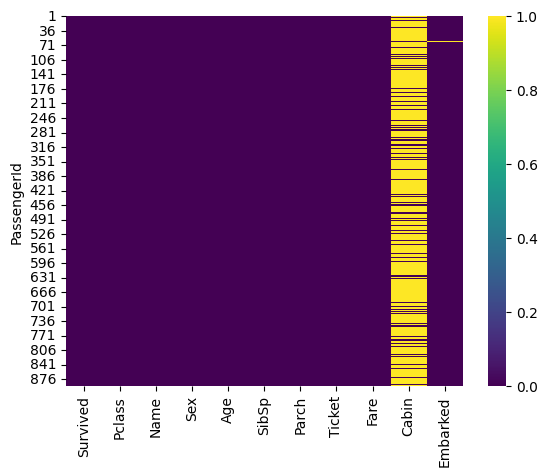

In [31]:
sns.heatmap(data.isna(), cmap = 'viridis')

In [30]:
data['Age'] = data['Age'].fillna(24)

##Категориальные признаки

In [32]:
cat_cols = data.describe(include='object').columns.to_list()
cat_data = data[cat_cols]
cat_data.head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [33]:
cat_data.drop('Name', axis =1, inplace = True)

<ipython-input-33-2c38f23e22ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop('Name', axis =1, inplace = True)


In [34]:
cat_data.head()

,Sex,Ticket,Cabin,Embarked
PassengerId,,,,
1,male,A/5 21171,NaN,S
2,female,PC 17599,C85,C
3,female,STON/O2. 3101282,NaN,S
4,female,113803,C123,S
5,male,373450,NaN,S


###labelEncodel


In [35]:
le = LabelEncoder()
for i in cat_data.columns.to_list():
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
  with open(f'{i}_LE.pkl', 'wb') as f:
    pickle.dump(le, f)
cat_data.head()

<ipython-input-35-f598f1d2ba7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-35-f598f1d2ba7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-35-f598f1d2ba7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Sex,Ticket,Cabin,Embarked,Sex_LE,Ticket_LE,Cabin_LE,Embarked_LE
PassengerId,,,,,,,,
1,male,A/5 21171,NaN,S,1,523,147,2
2,female,PC 17599,C85,C,0,596,81,0
3,female,STON/O2. 3101282,NaN,S,0,669,147,2
4,female,113803,C123,S,0,49,55,2
5,male,373450,NaN,S,1,472,147,2


In [36]:
cat_data = cat_data.drop(cat_cols[1:], axis = 1)
cat_data.head()

,Sex_LE,Ticket_LE,Cabin_LE,Embarked_LE
PassengerId,,,,
1,1,523,147,2
2,0,596,81,0
3,0,669,147,2
4,0,49,55,2
5,1,472,147,2


##числовые признаки

In [37]:
num_cols = data.describe().columns.to_list()
num_data = data[num_cols]
num_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


#standardscaler

In [38]:
dataset = pd.concat([cat_data, num_data], axis = 1)
dataset.head()

,Sex_LE,Ticket_LE,Cabin_LE,Embarked_LE,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,
1,1,523,147,2,0,3,22.0,1,0,7.2500
2,0,596,81,0,1,1,38.0,1,0,71.2833
3,0,669,147,2,1,3,26.0,0,0,7.9250
4,0,49,55,2,1,1,35.0,1,0,53.1000
5,1,472,147,2,0,3,35.0,0,0,8.0500


In [39]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset.drop('Survived', axis = 1))

In [40]:
dataset_df = pd.DataFrame(data = dataset_scaled,
                          columns = dataset.drop('Survived', axis = 1).columns.to_list() )
dataset_df.head()

,Sex_LE,Ticket_LE,Cabin_LE,Embarked_LE,Pclass,Age,SibSp,Parch,Fare
0,0.737695,0.918966,0.451502,0.581114,0.827377,-0.497793,0.432793,-0.473674,-0.502445
1,-1.355574,1.282625,-1.381627,-1.938460,-1.566107,0.715048,0.432793,-0.473674,0.786845
2,-1.355574,1.646283,0.451502,0.581114,0.827377,-0.194583,-0.474545,-0.473674,-0.488854
3,-1.355574,-1.442322,-2.103768,0.581114,-1.566107,0.487640,0.432793,-0.473674,0.420730
4,0.737695,0.664904,0.451502,0.581114,0.827377,0.487640,-0.474545,-0.473674,-0.486337


In [41]:
with open('num_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f) #сохраняем StandardScaler

<Axes: >

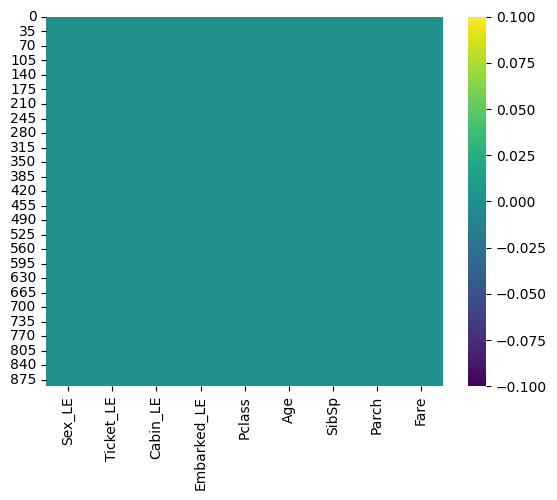

In [42]:
sns.heatmap(dataset_df.isna(), cmap = 'viridis')

#X & y

In [43]:
y = np.array(data['Survived'])
X = np.array(dataset_df)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


#ML

In [46]:
gausNB = GaussianNB()
gausNB.fit(X_train, y_train)

GaussianNB()

In [48]:
gausNB.predict(X_test[:3])

array([0, 0, 0])

#Сохраняем модель

In [49]:
with open('gaussNB.pkl', 'wb') as f:
  pickle.dump(gausNB, f)